# House Prices Prediction

## Importing:

In [111]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# get_description() is a function to get the description of any column name or a value.
# It takes the column/value name, or any list of them:
from data_description import get_description

%matplotlib inline
sns.set_style('darkgrid')



### Importing the 'clean_dataset.csv' file:

In [ ]:
clean_data = pd.read_csv('data/clean_dataset.csv', index_col=0).drop(columns=['Id'])
clean_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No_Alley,Reg,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,No_MiscFeature,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,No_Alley,Reg,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,No_MiscFeature,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,No_Alley,IR1,Lvl,AllPub,Inside,...,0,No_Pool,No_Fence,No_MiscFeature,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,No_Alley,IR1,Lvl,AllPub,Corner,...,0,No_Pool,No_Fence,No_MiscFeature,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,No_Alley,IR1,Lvl,AllPub,FR2,...,0,No_Pool,No_Fence,No_MiscFeature,0,12,2008,WD,Normal,250000.0


In [ ]:
categorical = [x for x in clean_data.columns if clean_data[x].dtype == 'object']
numerical = [x for x in clean_data.columns if (clean_data[x].dtype != 'object') and (x != 'SalePrice')]

## Feature engineering:

#### NOTE: All feature engineering should be done clean_data as a whole. Because. train and test data are obtained by splitting after the feature engineering is finished.

In [ ]:
from modeling import feat_eng, model_cv

# the dataset after feature engineering without normalization or standardization.
data = feat_eng(clean_data)

# the normalized dataset
data_norm = feat_eng(clean_data,
                    standardize=False,
                    normalize=True)

# the standardized and normalized dataset
data_std = feat_eng(clean_data,
                    standardize=True,
                    normalize=True)


X = data_std.drop(columns=['SalePrice'])[:1460]
y = data_std['SalePrice'][:1460]

X_target = data_std.drop(columns=['SalePrice'])[1460:]

X.shape

(1460, 337)

C:\Users\Ziad\AppData\Local\Temp\ipykernel_15712\3448206175.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Ziad\AppData\Local\Temp\ipykernel_15712\3448206175.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




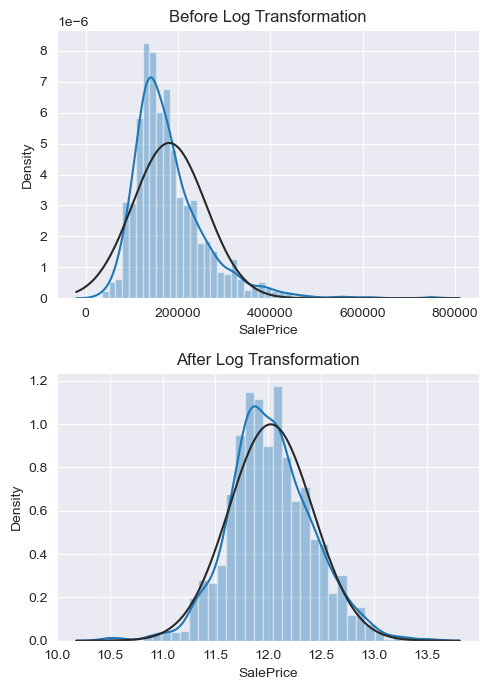

In [135]:
from scipy import stats
from scipy.stats import norm

fig, axes = plt.subplots(2, 1, figsize=(5, 7))

sns.distplot(data['SalePrice'][:1460], ax=axes[0], fit=norm)
axes[0].set_title('Before Log Transformation')

sns.distplot(data_std['SalePrice'][:1460], ax=axes[1], fit=norm)
axes[1].set_title('After Log Transformation')
plt.tight_layout()
plt.show()

## Feature Selection

#### Single cross validation using Ridge to select the best features.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge

# recursive feature elimination
rfe = RFECV(Ridge(), cv=5, scoring='neg_mean_squared_error')
selector = rfe.fit(X, y)
print(f'Number of Selected Features: {selector.n_features_}')
selected_feat = selector.get_feature_names_out().tolist()

Number of Selected Features: 131


#### Double cross validation using RidgeCV to select the best features.

Using RidgeCV:

In [ ]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import RidgeCV
# lambdas = np.linspace(1, 30, 100)

# # recursive feature elimination
# rfe = RFECV(RidgeCV(alphas=lambdas), cv=5, scoring='neg_mean_squared_error')
# selector = rfe.fit(X, y)
# print(f'Number of Selected Features: {selector.n_features_}')
# selected_feat = selector.get_feature_names_out().tolist()

Selected features using RidgeCV:

In [ ]:
selected_feat1 = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 
                 'GrLivArea', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'LastRemodeled', 
                 'TotalBathrooms', 'MSSubClass_160', 'MSSubClass_20', 'MSSubClass_70', 
                 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'Street_Pave', 
                 'LotShape_IR3', 'LandContour_Bnk', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LandSlope_Sev', 
                 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 
                 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 
                 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 
                 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Artery', 
                 'Condition1_Norm', 'Condition1_RRAe', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 
                 'Condition2_PosN', 'BldgType_Duplex', 'HouseStyle_1.5Unf', 'HouseStyle_2Story', 'RoofStyle_Mansard', 
                 'RoofMatl_ClyTile', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 
                 'MasVnrType_BrkCmn', 'MasVnrType_No_Bsmt', 'ExterCond_Ex', 'ExterCond_Fa', 
                 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_No_Bsmt', 
                 'BsmtCond_Fa', 'BsmtCond_No_Bsmt', 'BsmtExposure_Gd', 'BsmtFinType1_No_Bsmt', 
                 'BsmtFinType2_BLQ', 'Heating_GasW', 'Heating_Grav', 'HeatingQC_Ex', 'CentralAir_Y', 
                 'KitchenQual_Ex', 'Functional_Maj2', 'Functional_Sev', 'Functional_Typ', 'GarageType_2Types', 
                 'GarageQual_Ex', 'GarageQual_Gd', 'GarageCond_Fa', 'PoolQC_Ex', 'PoolQC_Gd', 
                 'Fence_GdWo', 'MiscFeature_Othr', 'SaleType_COD', 'SaleType_ConLD', 'SaleType_New', 
                 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_Normal'
                 ]

Using LassoCV:

In [ ]:
# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LassoCV

# lambdas = list(np.linspace(0.0005, 0.0007, 100))

# # recursive feature elimination
# rfe = RFECV(LassoCV(alphas=lambdas), cv=5, scoring='neg_mean_squared_error')
# selector = rfe.fit(X, y)
# print(f'Number of Selected Features: {selector.n_features_}')
# selected_feat2 = selector.get_feature_names_out().tolist()

Selected features using LassoCV:

In [ ]:
selected_feat2 = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 
                  'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'HalfBath', 
                  'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 
                  'HouseAge', 'LastRemodeled', 'TotalBathrooms', 'MSSubClass_120', 'MSSubClass_160', 
                  'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_70', 'MSSubClass_90', 
                  'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RM', 'Alley_Pave', 'LandContour_Bnk', 
                  'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_BrkSide', 
                  'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 
                  'Neighborhood_Mitchel', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 
                  'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 
                  'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Norm', 'Condition2_PosN', 
                  'BldgType_1Fam', 'HouseStyle_2Story', 'RoofMatl_ClyTile', 'RoofMatl_WdShngl', 
                  'Exterior1st_BrkFace', 'Exterior1st_MetalSd', 'Exterior1st_Wd Sdng', 
                  'Exterior2nd_VinylSd', 'MasVnrType_BrkCmn', 'ExterQual_TA', 'ExterCond_TA', 
                  'Foundation_BrkTil', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 
                  'BsmtCond_Fa', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_LwQ', 
                  'BsmtFinType2_BLQ', 'Heating_GasW', 'HeatingQC_Ex', 'CentralAir_N', 
                  'KitchenQual_Ex', 'KitchenQual_TA', 'Functional_Typ', 'GarageType_Detchd', 
                  'GarageQual_Fa', 'GarageCond_Fa', 'PavedDrive_Y', 'Fence_GdWo', 'MoSold_Jul', 
                  'MoSold_Jun', 'MoSold_May', 'YrSold_2009', 'SaleType_COD', 'SaleType_New', 
                  'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_Family', 'SaleCondition_Normal'
                  ]

In [ ]:
both = []
for i in selected_feat2:
    if i in selected_feat:
        both.append(i)
        
len(both)

53

In [ ]:
num = []
cat = []
vals = []

for feat in selected_feat:
    if '_' in feat:
        feat1 = feat.split('_')[0]
        cat1 = feat.split('_')[1]
        cat.append(feat1)
        vals.append(cat1)
    else:
        num.append(feat)

cate = []
for c in cat:
    if c not in cate:
        cate.append(c)


In [138]:
len(both)

53

### Cross validation with RidgeCV and a selected number of features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV
lambdas = np.linspace(1, 30, 100)

# recursive feature elimination
rfe = RFE(RidgeCV(alphas=lambdas), n_features_to_select=20)
selector = rfe.fit(X, y)
print(f'Number of Selected Features: {selector.n_features_}')
selected_feat3 = selector.get_feature_names_out().tolist()

Number of Selected Features: 20


whiche selected features are used?

In [ ]:
selected_feat = selected_feat1

## Modeling:

In [ ]:
# a dataframe to save the results of the models performances
results = pd.DataFrame(columns=['RMSLE', 'R2'])

### Ridge Regression:

Finding the best Lambda for Ridge Regression:

In [ ]:


lambdas = np.linspace(1, 6, 100)
ridge_cv_results = [model_cv(Ridge(alpha=lam), X[selected_feat], y) for lam in lambdas]
ridge_cv_results = pd.DataFrame(ridge_cv_results, columns=['RMSLE', 'R2'], index=lambdas)
ridge_cv_results.index.name='Lambda'

best_lambda = ridge_cv_results['RMSLE'].idxmin()
RMSLE = ridge_cv_results.loc[best_lambda, 'RMSLE']
r2 = ridge_cv_results.loc[best_lambda, 'R2']



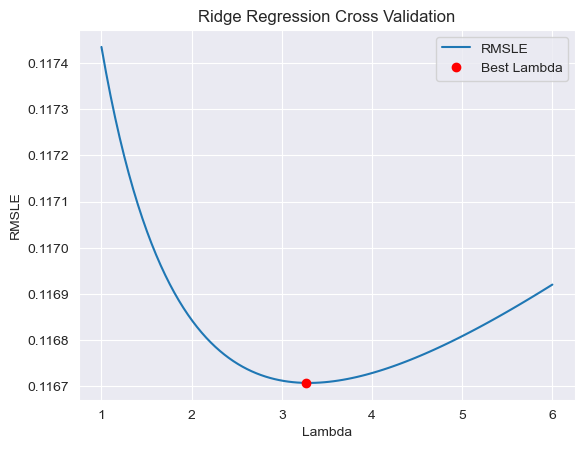

In [ ]:
ridge_cv_results['RMSLE'].plot(title="Ridge Regression Cross Validation")
plt.plot(best_lambda, RMSLE, 'ro', label= 'Best Lambda')
plt.xlabel("Lambda")
plt.ylabel("RMSLE")
plt.legend(loc="upper right")
plt.show()

In [ ]:
print(f"Best lambda: {best_lambda}")
print(ridge_cv_results.loc[best_lambda].to_string())


Best lambda: 3.303030303030303
RMSLE    0.116707
R2       0.913612


In [ ]:
results.loc[f'Ridge Regression [λ = {best_lambda.round(2)}]'] = [RMSLE, r2]
results

,RMSLE,R2
Ridge Regression [λ = 3.3],0.116707,0.913612


In [ ]:
from  sklearn.metrics  import  mean_squared_error ,  r2_score

ridge_model = Ridge(alpha=best_lambda)
ridge_model = ridge_model.fit(X[selected_feat], y)

y_pred = ridge_model.predict(X[selected_feat])
print(f'Ridge Regression [λ = {best_lambda.round(2)}] for all data:')
print(f'RMSLE: {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'r2: {r2_score(y, y_pred)}')

Ridge Regression [λ = 3.27] for all data:
RMSLE: 0.10488383992448637
r2: 0.9310091570877083


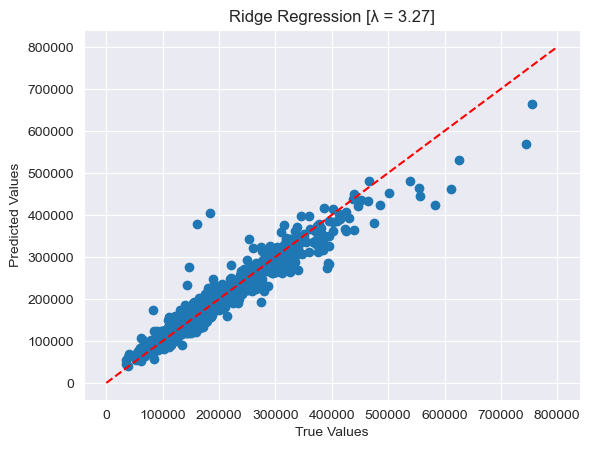

In [110]:
plt.scatter(np.exp(y), np.exp(y_pred))
plt.plot([0, 800000], [0, 800000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f'Ridge Regression [λ = {best_lambda.round(2)}]')
plt.show()

In [ ]:
ridge = Ridge(alpha=best_lambda)

### Lasso Regression:

Finding the best lambda for Lasso Regression:

In [ ]:
from sklearn.linear_model import Lasso

lambdas = list(np.linspace(0.0001, 0.0005, 100))

lasso_cv_results = [model_cv(Lasso(alpha=lam), X[selected_feat], y) for lam in lambdas]
lasso_cv_results = pd.DataFrame(lasso_cv_results, columns=['RMSLE', 'R2'], index=lambdas)
lasso_cv_results.index.name='Lambda'

best_lambda = lasso_cv_results['RMSLE'].idxmin()
RMSLE = lasso_cv_results.loc[best_lambda, 'RMSLE']
r2 = lasso_cv_results.loc[best_lambda, 'R2']


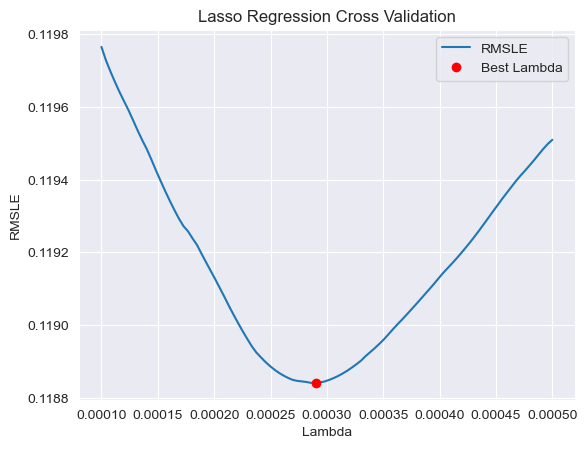

In [ ]:
lasso_cv_results['RMSLE'].plot(title="Lasso Regression Cross Validation")
plt.plot(best_lambda, RMSLE, 'ro', label= 'Best Lambda')
plt.xlabel("Lambda")
plt.ylabel("RMSLE")
plt.legend(loc="upper right")
plt.show()

In [ ]:
print(f"Best lambda: {best_lambda}")
print(lasso_cv_results.loc[best_lambda].to_string())


Best lambda: 0.0002846153846153846
RMSLE    0.118841
R2       0.910311


In [ ]:
lasso_model = Lasso(alpha=best_lambda)
lasso_model = lasso_model.fit(X[selected_feat], y)

y_pred = lasso_model.predict(X[selected_feat])
print(f'Lasso Regression [λ = {best_lambda.round(5)}] for all data:')
print(f'RMSLE: {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'r2: {r2_score(y, y_pred)}')

Lasso Regression [λ = 0.00028] for all data:
RMSLE: 0.103822440576023
r2: 0.9323984333908424


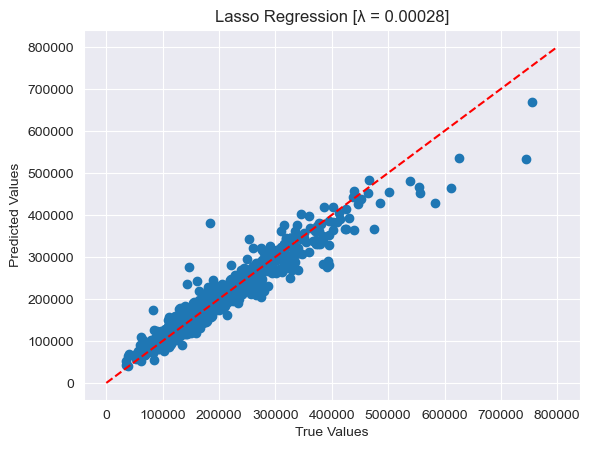

In [ ]:
plt.scatter(np.exp(y), np.exp(y_pred))
plt.plot([0, 800000], [0, 800000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f'Lasso Regression [λ = {best_lambda.round(5)}]')
plt.show()

In [ ]:
results.loc[f'Lasso Regression [λ = {best_lambda.round(5)}]'] = [RMSLE, r2]
results

,RMSLE,R2
Ridge Regression [λ = 3.3],0.116707,0.913612
Lasso Regression [λ = 0.00028],0.118841,0.910311


In [ ]:
lasso = Lasso(alpha=best_lambda)

### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

# mrse, r2 = model_cv(mlr_model, X[selected_feat], y)

X_norm = data_norm.drop(columns=['SalePrice'])[:1460]
y_norm = data_norm['SalePrice'][:1460]

mlr_model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_norm[selected_feat], y_norm, test_size = 0.2, random_state =42 )

mlr_model = mlr_model.fit(X_train, y_train)


In [ ]:
y_pred = mlr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
RMSLE = np.sqrt(mean_squared_error(y_test, y_pred))

results.loc[f'Multiple Linear Regression'] = [RMSLE, r2]
results

,RMSLE,R2
Ridge Regression [λ = 3.3],0.116707,0.913612
Lasso Regression [λ = 0.00028],0.118841,0.910311
Multiple Linear Regression,0.115352,0.928696


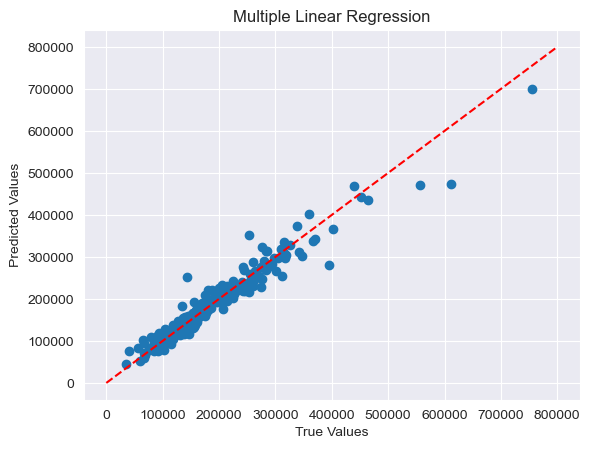

In [ ]:
plt.scatter(np.exp(y_test), np.exp(y_pred))
plt.plot([0, 800000], [0, 800000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f'Multiple Linear Regression')
plt.show()

In [ ]:
m_linear = LinearRegression()

### XGBoost:

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# # Define your XGBoost model
# xgb_model = xgb.XGBRegressor()

# # Define the parameter grid
# param_grid = {
#     'max_depth': [2, 3, 4],
#     'learning_rate': [0.08, 0.05, 0.03],
#     'n_estimators': [1000, 2000, 3000],
#     'min_child_weight': [2, 3, 4],
#     'reg_alpha': [0.3, 0.4, 0.5],
#     'reg_lambda': [0.6, 0.8, 1]
#     }
    

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# # Fit the GridSearchCV object to the data
# grid_search.fit(X[selected_feat], y)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Train the model with the best parameters
# best_model = xgb.XGBRegressor(**best_params)
# best_model.fit(X[selected_feat], y)


In [ ]:
best_params___ = {'learning_rate': 0.3,
                    'max_depth': 2,
                    'min_child_weight': 3,
                    'n_estimators': 1500,
                    'reg_alpha': 0.4,
                    'reg_lambda': 0.2}

In [164]:
best_params = {'learning_rate': 0.08,
                'max_depth': 2,
                'min_child_weight': 3,
                'n_estimators': 3000,
                'reg_alpha': 0.3,
                'reg_lambda': 1,
                }

In [165]:
from xgboost import XGBRegressor

xgb = XGBRegressor(gamma=0,
                    nthread=-1,
                    scale_pos_weight=1,
                    **best_params)

RMSLE, r2 = model_cv(xgb, X[selected_feat], y)

In [168]:
xgb.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.08,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 2,
 'max_leaves': None,
 'min_child_weight': 3,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.3,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'nthread': -1}

In [166]:
results.loc[f'XGBoost'] = [RMSLE, r2]
results

,RMSLE,R2
Model,,
Ridge Regression [λ = 3.3],0.116707,0.913612
Lasso Regression [λ = 0.00028],0.118841,0.910311
Multiple Linear Regression,0.115352,0.928696
XGBoost,0.114570,0.917024
LightGBM,0.119720,0.909500
Average Predictions,0.112458,0.915632


In [169]:
xgb = xgb.fit(X[selected_feat], y)

y_pred = xgb.predict(X[selected_feat])
print(f'Lasso Regression [λ = {best_lambda.round(5)}] for all data:')
print(f'RMSLE: {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'r2: {r2_score(y, y_pred)}')

Lasso Regression [λ = 3.27273] for all data:
RMSLE: 0.06243968785392205
r2: 0.9755490498844925


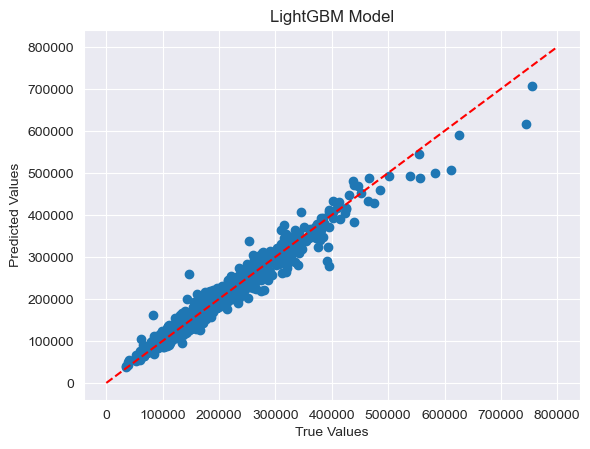

In [191]:
plt.scatter(np.exp(y), np.exp(y_pred))
plt.plot([0, 800000], [0, 800000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f'LightGBM Model')
plt.show()

In [150]:
xgboost = XGBRegressor(**best_params)

### LightGBM:

In [ ]:
# import lightgbm as lgb
# from sklearn.model_selection import GridSearchCV

# # Define your LightGBM model
# lgb_model = lgb.LGBMRegressor(objective='regression')

# # Define the parameter grid
# param_grid = {
#     'learning_rate':[0.03, 0.05, 0.07],
#     'n_estimators':[650, 750, 850],
#     'num_leaves':[2, 8],
#     'max_depth':[2, 3]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X[selected_feat], y)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# # Train the model with the best parameters
# best_model = lgb.LGBMRegressor(**best_params)
# best_model.fit(X_train, y_train)


In [172]:
best_params = {'learning_rate': 0.07, 
                'max_depth': 2, 
                'n_estimators': 850, 
                'num_leaves': 8
                }

In [178]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective='regression',
                    min_data_in_leaf=4,
                    bagging_fraction=0.78,
                    bagging_freq=5,
                    feature_fraction=0.24,
                     **best_params)

RMSLE, r2 = model_cv(lgbm, X[selected_feat], y)

results.loc[f'LightGBM'] = [RMSLE, r2]
results

[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.24, col

,RMSLE,R2
Model,,
Ridge Regression [λ = 3.3],0.116707,0.913612
Lasso Regression [λ = 0.00028],0.118841,0.910311
Multiple Linear Regression,0.115352,0.928696
XGBoost,0.114570,0.917024
LightGBM,0.115548,0.915567
Average Predictions,0.112458,0.915632


In [189]:
lgbm = lgbm.fit(X[selected_feat], y)

y_pred = lgbm.predict(X[selected_feat])
print(f'Lasso Regression [λ = {best_lambda.round(5)}] for all data:')
print(f'RMSLE: {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'r2: {r2_score(y, y_pred)}')

[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Lasso Regression [λ = 3.27273] for all data:
RMSLE: 0.08159684288891283
r2: 0.9582437966301387


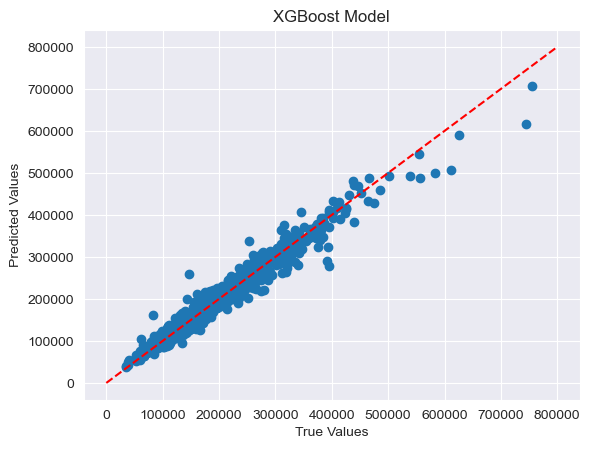

In [190]:
plt.scatter(np.exp(y), np.exp(y_pred))
plt.plot([0, 800000], [0, 800000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f'XGBoost Model')
plt.show()

### Average Predictions:

In [181]:
models = [ridge, lasso, xgboost, lgbm]

In [195]:

from modeling import avg_predict, fit_models

X_train, X_test, y_train, y_test = train_test_split(X[selected_feat], y, test_size = 0.2)

models_fit = fit_models(models, X_train, y_train)
y_pred = avg_predict(models_fit, X_test)

r2 = r2_score(y_test, y_pred)
RMSLE = np.sqrt(mean_squared_error(y_test, y_pred))

results.loc[f'Average Predictions'] = [RMSLE, r2]
results

[20:25:28] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.

[LightGBM] [Warning] feature_fraction is set=0.24, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.24
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.78, subsample=1.0 will be ignored. Current value: bagging_fraction=0.78
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


,RMSLE,R2
Model,,
Ridge Regression [λ = 3.3],0.116707,0.913612
Lasso Regression [λ = 0.00028],0.118841,0.910311
Multiple Linear Regression,0.115352,0.928696
XGBoost,0.114570,0.917024
LightGBM,0.115548,0.915567
Average Predictions,0.105223,0.936973


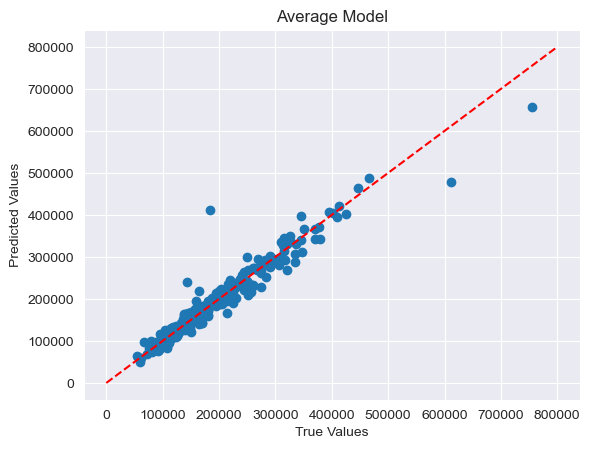

In [196]:
plt.scatter(np.exp(y_test)-1, np.exp(y_pred)-1)
plt.plot([0, 800000], [0, 800000], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f'Average Model')
plt.show()

In [184]:
# res = [model_cv(model, X[selected_feat], y) for model in models]

In [185]:
# print(pd.DataFrame(res, columns=['RMSLE', 'R2']).mean(axis=0).to_string())

In [200]:

y_pred = avg_predict(models_fit, X_target[selected_feat])
y_pred_final = np.exp(y_pred) - 1
results_df = pd.DataFrame({'Id': X_target.index, 'SalePrice': y_pred_final})
results_df

,Id,SalePrice
0,1460,116303.067457
1,1461,156186.424651
2,1462,183042.492041
3,1463,195609.209288
4,1464,191564.147780
...,...,...
1454,2914,86359.068899
1455,2915,83943.857770
1456,2916,160264.904371
1457,2917,115893.191578


In [201]:
# results_df.to_csv('data/results.csv', index=False)

In [204]:
results_df.set_index('Id').head(10)

,SalePrice
Id,
1460,116303.067457
1461,156186.424651
1462,183042.492041
1463,195609.209288
1464,191564.147780
1465,169975.451705
1466,187312.833409
1467,165509.772854
1468,195284.270096


### Save the models into files:

In [205]:
import pickle
for model in models_fit:
    with open("models/" + type(model).__name__ + '.pkl', 'wb') as file:  
        pickle.dump(model, file)


The models then can be imported like this:

In [187]:
import os
files = os.listdir('models')

models2 = []
for file in files:
    with open('models/' + file, 'rb') as file:  
        model = pickle.load(file)
        models2.append(model)
models2

[Lasso(alpha=0.0002846153846153846),
 LGBMRegressor(bagging_fraction=0.78, bagging_freq=5, feature_fraction=0.24,
               learning_rate=0.07, max_depth=2, min_data_in_leaf=4,
               n_estimators=850, num_leaves=8, objective='regression'),
 LinearRegression(),
 Ridge(alpha=3.303030303030303),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=3000, n_jobs=None, num_leaves=8,
         

In [208]:
results.index.name = 'Model'
results

,RMSLE,R2
Model,,
Ridge Regression [λ = 3.3],0.116707,0.913612
Lasso Regression [λ = 0.00028],0.118841,0.910311
Multiple Linear Regression,0.115352,0.928696
XGBoost,0.114570,0.917024
LightGBM,0.115548,0.915567
Average Predictions,0.105223,0.936973
